In [134]:
import tensorflow as tf
print(tf.__version__)

2.5.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [135]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [136]:
# Build the Sequential feedforward neural network model

model = Sequential([       
     Flatten(input_shape = (28,28)),
     Dense(16, activation='relu'),
     Dense(16, activation='relu'),
     #Dense(10, activation='softmax')
     Dense(10),
     Softmax()
])

In [137]:
# Print the model summary

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_26 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_27 (Dense)             (None, 10)                170       
_________________________________________________________________
softmax_6 (Softmax)          (None, 10)                0         
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [138]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [139]:
# Build the Sequential convolutional neural network model

#padding -> SAME, VALID
#strides -> a quantidade de pixels utilizadas para saltar
#data_format -> utilizado para modificar a a forma da saida : channels_first, channels_last


model = Sequential([
    #Conv2D(channels_out, (kernel_size,kernel_size), activation, input_shape = (weight, height, channels))
    Conv2D(16, (3,3), activation = 'relu', input_shape = (28,28,1)),
    #MaxPooling2D((pooling_size, pooling_size), data_format)
    MaxPooling2D((3,3)),
    #Flatten() ou Flatten((dim1, dim2)) -> produz um vetor unidimensional
    Flatten(),
    #Dense(unidades_neurônios, ativação)
    Dense(10, activation='softmax')
])


In [140]:
# Print the model summary
model.summary()


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [141]:
# Define the model optimizer, loss function and metrics

#valores customizados para opt, loss, e metrics é necessário
#instanciar um objeto e passar o valor desejado no construtor
                                #valor customizado para os atributos do optimizer
#loss = tf.keras.losses.SparseCategoricalCrossentropy()                             #passar valores custimizados para a função de perda
#metrics = [tf.keras.metrics.Accuracy(), tf.keras.metrics.MeanAbsoluteError()]      #passar valores customizados para as métricas

opt = tf.keras.optimizers.Adam(learning_rate=0.005)

model.compile(optimizer = opt,
             loss = 'sparse_categorical_crossentropy',
             metrics = ['sparse_categorical_accuracy','mae'])


In [142]:
# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)

sparse_categorical_crossentropy
[]


***
<a id="coding_tutorial_4"></a>
## The fit method

In [143]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [144]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [145]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [146]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [147]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images / 255.0

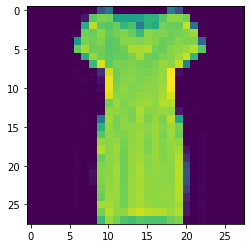

Dress


In [148]:
# Display one of the images

i = 20
plt.imshow(train_images[i, :,:])
plt.show()
print(labels[train_labels[i]])


#### Fit the model

In [149]:
# Fit the model

history = model.fit(train_images.reshape(-1,28,28,1), train_labels, epochs=10, batch_size=256)

Epoch 1/10
235/235 [==============================] - 1s 4ms/step - loss: 0.5602 - sparse_categorical_accuracy: 0.8049 - mae: 4.4200
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.3606 - sparse_categorical_accuracy: 0.8728 - mae: 4.4200
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.3268 - sparse_categorical_accuracy: 0.8841 - mae: 4.4200
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.3112 - sparse_categorical_accuracy: 0.8891 - mae: 4.4200
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2993 - sparse_categorical_accuracy: 0.8924 - mae: 4.4200
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2925 - sparse_categorical_accuracy: 0.8946 - mae: 4.4200
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2819 - sparse_categorical_accuracy: 0.8978 - mae: 4.4200
Epoch 8/10
235/235 [==============================] - 1s 4ms/step - l

#### Plot training history

In [150]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df.tail(10)

,loss,sparse_categorical_accuracy,mae
0,0.560185,0.804950,4.420001
1,0.360572,0.872783,4.420000
2,0.326778,0.884067,4.420000
3,0.311186,0.889100,4.420000
4,0.299280,0.892450,4.419999
5,0.292507,0.894583,4.420002
6,0.281896,0.897800,4.420000
7,0.276527,0.900483,4.420000
8,0.270354,0.901717,4.420000
9,0.266559,0.903433,4.420001


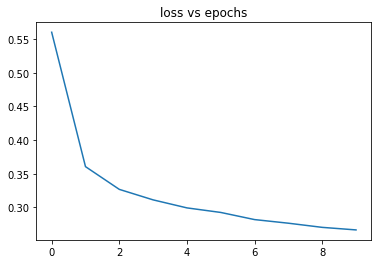

In [151]:
# Make a plot for the loss

df.plot(y='loss', title = "loss vs epochs", legend = False)
plt.show()


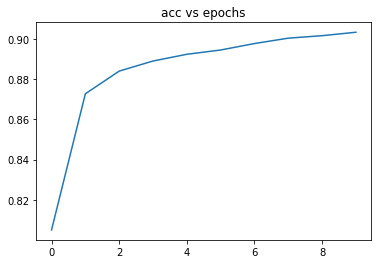

In [152]:
# Make a plot for the accuracy
df.plot(y='sparse_categorical_accuracy', title = 'acc vs epochs', legend = False)
plt.show()

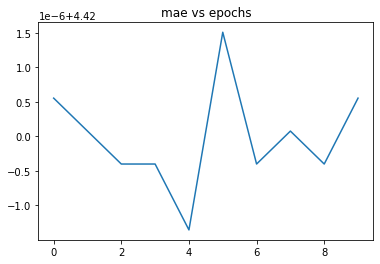

In [154]:
# Make a plot for the additional metric
df.plot(y='mae', title = 'mae vs epochs', legend = False)
plt.show()


***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [155]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [157]:
# Evaluate the model

model.evaluate(test_images.reshape(-1,28,28,1), test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 71.4912 - sparse_categorical_accuracy: 0.8160 - mae: 4.4200


[71.49116516113281, 0.8159999847412109, 4.419997215270996]

#### Make predictions from the model

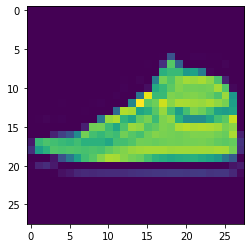

Label: Sneaker


In [158]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [170]:
# Get the model predictions

pred = model.predict(test_image.reshape(1,28,28,1))
labels[np.argmax(pred, axis = 1)[0]]

'Sneaker'